In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Initializing packages

In [ ]:
import numpy as np  
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 


# Importing datasets

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Description about Problem

## Context

It's a great time to be a craft beer fan in the U.S.! There are a ton of beer styles and brands to choose from and breweries have become very successful in the last several years. Breweries owe it all to beer lovers around the world! This dataset contains a list of 2,410 US craft beers and 510 US breweries. The beers and breweries are linked together by the "id". This data was collected in January 2017 from CraftCans.com. The dataset is an a tidy format and values have been cleaned up for your enjoyment.

## Content

beers.csv - Contains data on 2000+ craft canned beers

breweries.csv - Contains data for 500+ breweries in the United States

Abbreviation: ABV: ABV-Alcohol by volume , IBU: International Bitterness Units

## Acknowledgements

If you are interested in learning more about how this dataset was acquired, I wrote an extensive blogpost about it http://www.jeannicholashould.com/python-web-scraping-tutorial-for-craft-beers.html.

## Inspiration

Can you predict the beer type from the characteristics provided in the dataset?

What is the most popular beer in North Dakota?

Cheers to beer


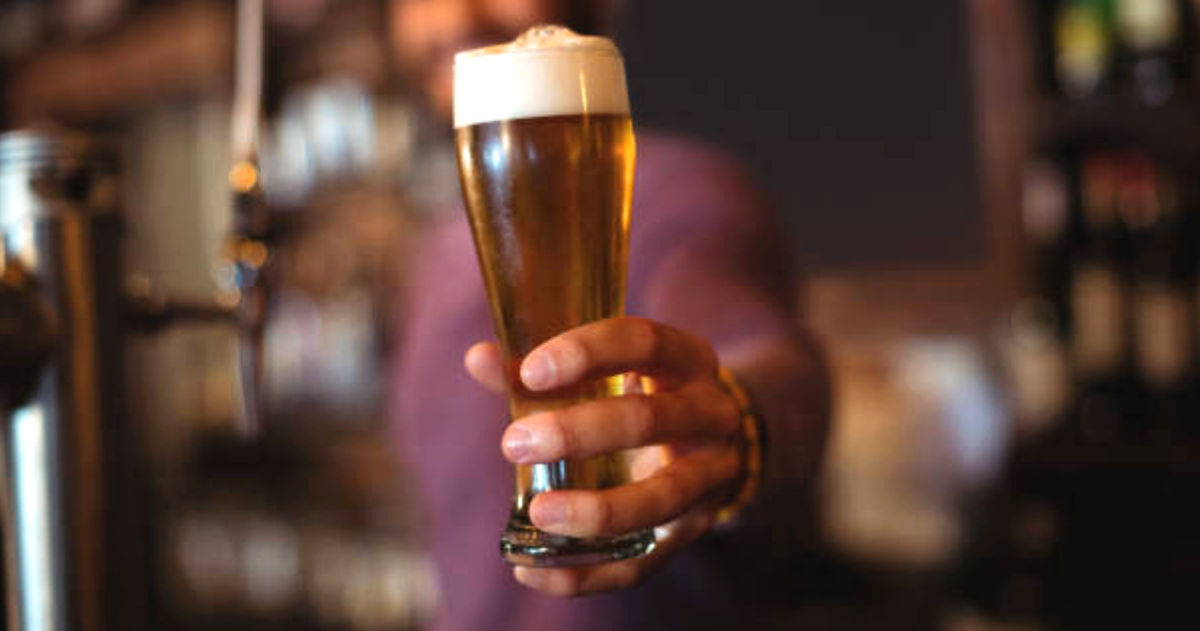

# Understand the dataset

In [ ]:
## Craft Canned beer 

craft_canned_beer= pd.read_csv('/kaggle/input/craft-cans/beers.csv')
craft_canned_beer.head()

In [ ]:
## dropping id column from beer dataset

craft_canned_beer.drop(['id'],axis=1,inplace=True)

In [ ]:
# Craft beer
craft_canned_beer.head()

In [ ]:
breweries= pd.read_csv('/kaggle/input/craft-cans/breweries.csv')
breweries.head()

# Joining breweries and canned beer dataset

The beers and breweries are linked together by the "id".



In [ ]:
## creating column name for unnnamed column both in breweries dataset
breweries.rename(columns = {'Unnamed: 0':'id'}, inplace = True) 
craft_canned_beer.rename(columns={'Unnamed: 0':'id'},inplace=True)
breweries.columns
breweries.head()
print(craft_canned_beer.head())


In [ ]:
beer_breweries_join_dataset= pd.merge(craft_canned_beer,
                 breweries[['id', 'name', 'city','state']],
                 on='id', 
                 how='outer', 
                 indicator=True)

## columns of beer_breweries_joined_dataset
beer_breweries_join_dataset.columns

In [ ]:
beer_breweries_join_dataset.head()

# Dropping some columns

In [ ]:
beer_breweries_join_dataset.drop(['_merge'],axis=1,inplace=True)


In [ ]:
beer_breweries_join_dataset.head()

# Renaming columns

In [ ]:
beer_breweries_join_dataset.rename(columns = {'name_x':'name_of_beer','name_y':'name_of_brewery',}, inplace = True) 
beer_breweries_join_dataset.head()


In [ ]:
##renaming the join dataset a new name

beer_breweries= beer_breweries_join_dataset


# head of dataset
print(beer_breweries.head())

In [ ]:
# Tail of dataset
print(beer_breweries.tail())

# Preprocessing the joined dataset

## 1. Data Info

In [ ]:
# Shape of dataset

print(beer_breweries.shape)

# Dataset Info

beer_breweries.info()

In [ ]:
### missing value info

print(beer_breweries.isnull().sum())



In [ ]:
## Replacing missing values of abv and ibu

standard_abv= 0.05
ibu_mean=beer_breweries['ibu'].mean()
beer_breweries.fillna({'abv':standard_abv,'ibu':ibu_mean},inplace=True)

In [ ]:
# info about dataset after replacing values in nan fields
print(beer_breweries.info())

# looking head of dataset
print(beer_breweries.head())

In [ ]:
## filter only missing values

beer_breweries[beer_breweries['state'].isnull()]

In [ ]:
## replacing the nan values of columns name_-f_brewery,city,state,style with mode() values

beer_breweries['name_of_brewery'].fillna(beer_breweries['name_of_brewery'].mode()[0], inplace=True)
beer_breweries['state'].fillna(beer_breweries['state'].mode()[0], inplace=True)
beer_breweries['city'].fillna(beer_breweries['city'].mode()[0], inplace=True)
beer_breweries['style'].fillna(beer_breweries['style'].mode()[0], inplace=True)


In [ ]:
beer_breweries.info()

In [ ]:
beer_breweries.tail()

In [ ]:
## removing brewery_id,id from beer_breweries dataset

beer_breweries.drop(['brewery_id','id'],axis=1,inplace=True)



In [ ]:
##dummies creation

# beer_breweries_dummy= pd.get_dummies(beer_breweries[['name_of_beer','style','name_of_brewery','city','state']])
# beer_breweries_dummy.shape

# EDA

### Pairplot

In [ ]:
sns.pairplot(beer_breweries)


## Correlation Matrix

In [ ]:
##correlation matrix

beer_breweries_corr= beer_breweries.corr()
print(beer_breweries_corr)
beer_breweries_features= beer_breweries_corr.index
plt.figure(figsize=(10,10))
beer_breweries_heatmap= sns.heatmap(beer_breweries[beer_breweries_features].corr(),annot=True,cmap='RdYlGn')

# Scaling the datasets

In [ ]:
## normalization of abv column to in scale of 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


beer_breweries['abv_scale']=scaler.fit_transform(beer_breweries['abv'].values.reshape(-1,1))
beer_breweries['ibu_scale']=scaler.fit_transform(beer_breweries['ibu'].values.reshape(-1,1))
beer_breweries.drop(['abv','ibu'],axis=1,inplace=True)







In [ ]:
## head of dataset

beer_breweries.head()

# Detecting outliers

In [ ]:
sns.boxplot(beer_breweries['abv_scale'])



In [ ]:
sns.boxplot(beer_breweries['ibu_scale'])

In [ ]:
from scipy.stats import zscore

beer_breweries['ibu_scale_zscore'] = zscore(beer_breweries['ibu_scale'])
beer_breweries['abv_scale_zscore']= zscore(beer_breweries['abv_scale'])


In [ ]:
beer_breweries_zscore= beer_breweries[(beer_breweries['ibu_scale_zscore'].abs()<=3) &(beer_breweries['abv_scale_zscore'].abs()<=3)]

beer_breweries_zscore.head()



In [ ]:
beer_breweries_zscore.drop(['ibu_scale_zscore','abv_scale_zscore'],axis=1,inplace=True)


In [ ]:
beer_breweries_zscore.head()

In [ ]:
## correlation after outlier removal and scaling

beer_breweries_zscore.corr()


## Building machine Learning Models

Inspiration
Can you predict the beer type from the characteristics provided in the dataset?

What is the most popular beer in North Dakota?

Cheers to beer

In [ ]:
## select the dependent and response variables
# beer_breweries_zscore.columns

beer_breweries_feature=beer_breweries_zscore.loc[:,['abv_scale','ibu_scale','ounces','style']]
print(beer_breweries_feature.head())
print("shape of dataset is:" ,beer_breweries_feature.shape)

## Choosing a model

In statistics, multinomial logistic regression is a classification method that generalizes **logistic regression to multiclass problems, i.e. with more than two possible discrete outcomes.**[1] 

That is, it is a model that is used to predict the probabilities of the **different possible outcomes of a categorically distributed dependent variable**, given a **set of 
independent variables (which may be real-valued, binary-valued, categorical-valued, etc.).**

Reference: https://en.wikipedia.org/wiki/Multinomial_logistic_regression

# Training and test creation

Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.

For example, in a binary classification problem where each class comprises of 50% of the data, it is best to 
arrange the data such that in every fold, each class comprises of about half the instances.

It is generally a better approach when dealing with both bias and variance. A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.

In [ ]:
# input 
x = beer_breweries_feature.iloc[:, 0:3].values 

# # output 
y = beer_breweries_feature.iloc[:, 3].values

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0) 

# Logistic regression with multinomial classification

In [ ]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0,multi_class='multinomial') 
classifier.fit(xtrain, ytrain) 
y_pred = classifier.predict(xtest) 




# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 
  
print ("Confusion Matrix : \n", cm)


# Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 
